In [1]:
import pandas as pd
from tqdm import tqdm
import warnings
from ast import literal_eval
from json import dumps
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
list_cols = ["Spacegroup", "FB Lattice Dimensionality", "FB Lattice IDs", "Systre Key", "Systre Spacegroup", "RCSR Name"]

In [3]:
df = pd.read_csv("mit_uncurated.csv", index_col="Index", converters={list_col:literal_eval for list_col in list_cols})
df_curated = pd.read_csv("mit_curated.csv", converters={list_col:literal_eval for list_col in list_cols}, index_col="Index")

# add column to indicate if part of curated list
df["curated"] = False
df.loc[df_curated.index, "curated"] = True

df = df.set_index(["MP ID", "FB Sublattice"])
df = df.sort_index(level=df.index.names)
print(df.columns)
df

/tmp/ipykernel_1935/2756290178.py:1: DtypeWarning: Columns (25,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mit_uncurated.csv", index_col="Index", converters={list_col:literal_eval for list_col in list_cols})


Index(['Chemical Formula', 'Anonymous Formula', 'N FBs', 'Sites per Unit Cell',
       'Sites in FB Sublattice', 'd_NN', 'd_NN,max', 'd_NNN', 'NN,max/NN',
       'NNN/NN,max', 'NNN/NN', 'N Elements', 'Spacegroup', 'Spacegroup Number',
       'E per Atom', 'Bandgap', 'ICSD Reference', 'FB Lattice Dimensionality',
       'FB Lattice IDs', 'Systre Key', 'Systre Spacegroup', 'RCSR Name',
       'Flat with decay', 'Flat with no decay',
       'FB Lattice with chi=1.02 and no decay',
       'FB Lattice with chi=1.05 and no decay',
       'FB Lattice with chi=1.1 and no decay',
       'FB Lattice with chi=1.2 and no decay',
       'FB Lattice with chi=1.4 and no decay',
       'FB Lattice with chi=1.02 and decay',
       'FB Lattice with chi=1.05 and decay',
       'FB Lattice with chi=1.1 and decay',
       'FB Lattice with chi=1.2 and decay',
       'FB Lattice with chi=1.4 and decay', 'curated'],
      dtype='object')


Chemical Formula Anonymous Formula  N FBs  \
MP ID      FB Sublattice                                             
mp-10004   Mo                        Mo3P               AB3      1   
           P                         Mo3P               AB3      2   
mp-1001012 Sc                     Sc2ZnS4             AB2C4      2   
mp-1001015 Y                       Y2ZnS4             AB2C4      2   
mp-1001016 Sc                    Sc2ZnSe4             AB2C4      2   
...                                   ...               ...    ...   
mvc-9991   O                      CaMn2O4             AB2C4      3   
mvc-9992   Ni                   Zn(NiO2)2             AB2C4      1   
mvc-9993   Cr                     MgCr2O4             AB2C4      1   
mvc-9995   Mo                   Zn(MoO2)2             AB2C4      1   
mvc-9997   Co                   Ca(CoO2)2             AB2C4      1   

                          Sites per Unit Cell  Sites in FB Sublattice  \
MP ID      FB Sublattice                                                
mp-10004   Mo                              16                      12   
           P                               16                       4   
mp-1001012 Sc                              14                       4   
mp-1001015 Y                               14                       4   
mp-1001016 Sc                              14                       4   
...                                       ...                     ...   
mvc-9991   O                               14                       8   
mvc-9992   Ni                              14                       4   
mvc-9993   Cr                              14                       4   
mvc-9995   Mo                              14                       4   
mvc-9997   Co                              14                       4   

                             d_NN  d_NN,max    d_NNN  NN,max/NN  NNN/NN,max  \
MP ID      FB Sublattice                                                      
mp-10004   Mo             2.58414   2.81538  2.85058   1.089484    1.012503   
           P              3.78353   3.78353  4.06416   1.000000    1.074171   
mp-1001012 Sc             3.73003   3.73003  6.46060   1.000000    1.732050   
mp-1001015 Y              3.90051   3.90051  6.75588   1.000000    1.732050   
mp-1001016 Sc             3.91380   3.91380  6.77890   1.000000    1.732051   
...                           ...       ...      ...        ...         ...   
mvc-9991   O              2.69634   2.82933  2.85690   1.049322    1.009744   
mvc-9992   Ni             2.89964   2.98132  3.42952   1.028169    1.150336   
mvc-9993   Cr             2.95417   3.03190  3.48982   1.026312    1.151034   
mvc-9995   Mo             3.19079   3.22376  3.65564   1.010333    1.133968   
mvc-9997   Co             3.01686   3.08818  3.51743   1.023640    1.138998   

                          ...  FB Lattice with chi=1.05 and no decay  \
MP ID      FB Sublattice  ...                                          
mp-10004   Mo             ...                                  False   
           P              ...                                   True   
mp-1001012 Sc             ...                                   TRUE   
mp-1001015 Y              ...                                   TRUE   
mp-1001016 Sc             ...                                   TRUE   
...                       ...                                    ...   
mvc-9991   O              ...                                   True   
mvc-9992   Ni             ...                                   True   
mvc-9993   Cr             ...                                   True   
mvc-9995   Mo             ...                                   TRUE   
mvc-9997   Co             ...                                   True   

                          FB Lattice with chi=1.1 and no decay  \
MP ID      FB Sublattice                                         
mp-10004   Mo                                             True   
 

<AxesSubplot:>

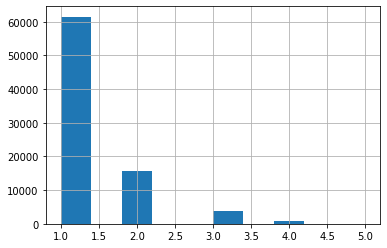

In [4]:
df.index.value_counts().hist()

In [5]:
list_cols

['Spacegroup',
 'FB Lattice Dimensionality',
 'FB Lattice IDs',
 'Systre Key',
 'Systre Spacegroup',
 'RCSR Name']

In [6]:
df_out = pd.DataFrame(index=df.index)
df_out.index = df_out.index.drop_duplicates()
df_out["rcsr_name"] = ""
df_out["icsd_id"] = ""
df_out["systre_key"] = ""
df_out["systre_spacegroup"] = ""
df_out["spacegroup"] = ""
df_out["spacegroup_number"] = ""
df_out["fb_lattice_dimensionality"] = ""
df_out["fb_lattice_ids"] = ""
df_out["mit_sublattice_spacegroups"] = ""
df_out["curated"] = False

In [7]:
for index in tqdm(df.index.unique()):
    df_out.at[index, "rcsr_name"] = dumps(df.loc[index, "RCSR Name"].values.tolist())
    df_out.at[index, "icsd_id"] = dumps(df.loc[index, "ICSD Reference"].values.tolist())
    df_out.at[index, "systre_key"] = dumps(df.loc[index, "Systre Key"].values.tolist())
    df_out.at[index, "systre_spacegroup"] = dumps(df.loc[index, "Systre Spacegroup"].values.tolist())
    df_out.at[index, "mit_sublattice_spacegroup_numbers"] = dumps(df.loc[index, "Spacegroup Number"].values.tolist())
    df_out.at[index, "fb_lattice_dimensionality"] = dumps(df.loc[index, "FB Lattice Dimensionality"].values.tolist())
    df_out.at[index, "fb_lattice_ids"] = dumps(df.loc[index, "FB Lattice IDs"].values.tolist())
    df_out.at[index, "mit_sublattice_spacegroups"] = dumps(df.loc[index, "Spacegroup"].values.tolist())
    df_out.at[index, "curated"] = df.loc[index, "curated"].values.any()
    

100%|██████████| 82011/82011 [09:44<00:00, 140.33it/s]


In [35]:
df_out.to_csv("mit_info.csv")